In [15]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [16]:
df = pd.read_csv('Traffic_Collision_Data_from_2010_to_Present.csv')

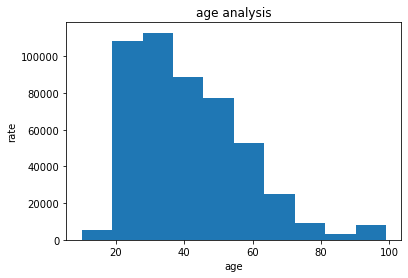

In [17]:
plt.hist(df['Victim Age'],bins=10)
plt.title("age analysis")
plt.xlabel("age")
plt.ylabel("rate")
plt.show()

/Users/babeelynn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


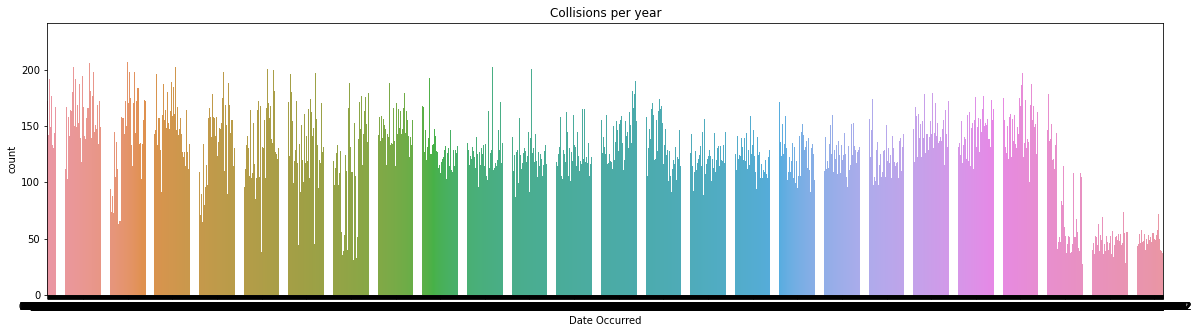

In [8]:
plt.subplots(figsize = (20,5))
# We have skiped 2020 because it doesn't have the entire year's data. 
df1 = df[(df['Date Occurred'].isin(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']))]
sns.countplot(df['Date Occurred'])
plt.title('Collisions per year') 
# sns.countplot(df['Date Occurred'])
plt.show()

In [9]:
df['Premise Description'].value_counts().head(10)

STREET                               546604
PARKING LOT                           18101
SIDEWALK                               3138
ALLEY                                  1031
DRIVEWAY                                990
FREEWAY                                 535
SINGLE FAMILY DWELLING                  359
GAS STATION                             343
TRANSPORTATION FACILITY (AIRPORT)       206
OTHER PREMISE                           171
Name: Premise Description, dtype: int64

/Users/babeelynn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

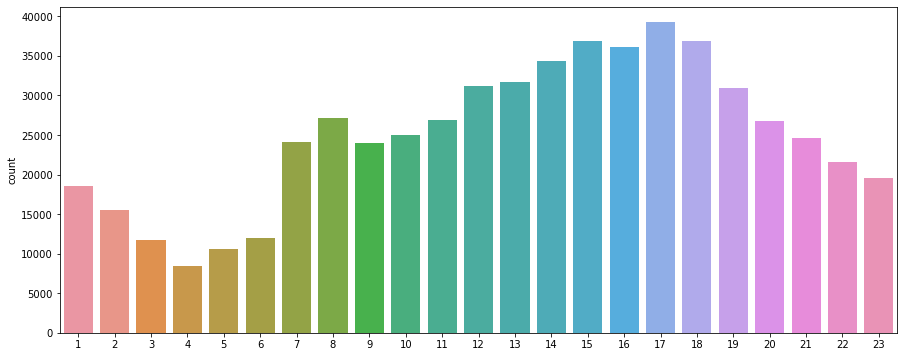

In [10]:
import datetime as dt
def convert(x):
    return dt.datetime.strptime(x, '%H:%M')
  
def getTime(t):
    t = str(t)
    if len(t)==1:
        return t[0]+':'+'00'
    if len(t)<4:
        return t[:1] + ':' + t[1:]
    else:
        return t[:2] + ':' + t[2:]
df['Time Occurred']= df['Time Occurred'].apply(getTime)

df['Time Occurred']=df['Time Occurred'].apply(convert)
hours = [t.hour for t in df['Time Occurred'] ]
numbers=[x for x in range(0,24)]
labels=map(lambda x: str(x), numbers)
plt.subplots(figsize = (15,6))
sns.countplot(hours)

/Users/babeelynn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


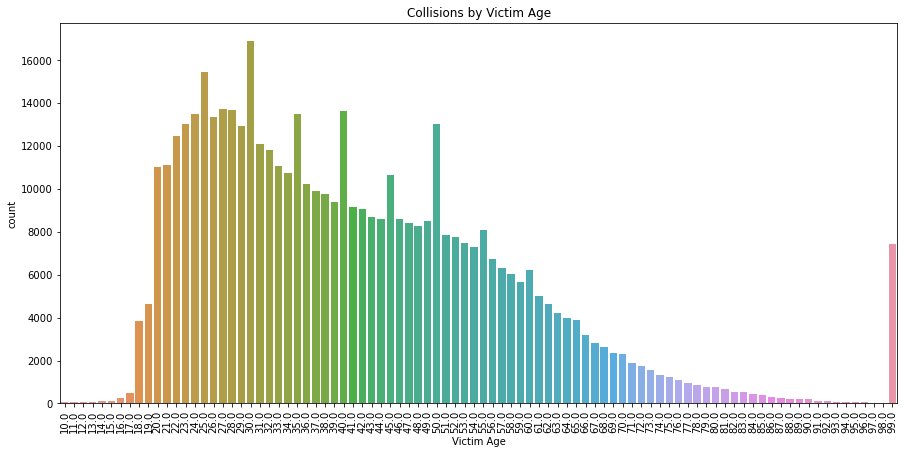

In [11]:
plt.subplots(figsize = (15,7))
sns.countplot(df['Victim Age'].sort_values(ascending = False))
plt.title('Collisions by Victim Age') 
plt.xticks(rotation = 90)
plt.show()

In [12]:
dff = pd.read_csv('frequency.csv')
v1 = dff['frequency']
v2 = dff['population']
pccs = pearsonr(v2, v1)
print(pccs)

freq = v1
X=sm.add_constant(freq)   #记得给X增加常数项列
regression=sm.OLS(v2,X) #选择Y对X进行OLS回归
model=regression.fit() #回归
model.summary()

(0.12202372985157217, 0.6295604536052278)


/Users/babeelynn/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             population   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.2418
Date:                Sun, 08 May 2022   Prob (F-statistic):              0.630
Time:                        23:19:04   Log-Likelihood:                -202.41
No. Observations:                  18   AIC:                             408.8
Df Residuals:                      16   BIC:                             410.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.702e+04   5730.255      6.460      0.000    2.49e+04    4.92e+04
frequency     15.8129     32.155      0.492      0.630     -52.353      83.978
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.109
Skew:                          -0.052   Prob(JB):                        0.947
Kurtosis:                       2.634   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'population density')

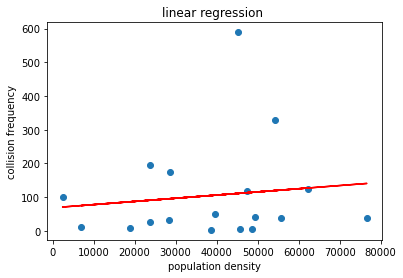

In [13]:
data=pd.DataFrame({'population': v2,
                    'frequency': v1
                   })
data_train=np.array(data['population']).reshape(data['population'].shape[0],1)
data_test=data['frequency']
regr=LinearRegression()
regr.fit(data_train,data_test)
plt.scatter(data['population'],data['frequency'])
plt.plot(data['population'],regr.predict(np.array(data['population']).reshape(data['population'].shape[0],1)),color='red')
plt.title("linear regression ")
plt.ylabel("collision frequency")
plt.xlabel("population density")